In [1]:
import pandas as pd
import numpy as np
import sys
from math import pi
import matplotlib.pyplot as plt

In [2]:
stations_file = sys.argv[1]
city_info_file = sys.argv[2]
filename3 = sys.argv[3]

In [3]:
#stations_file = 'stations.json.gz'
#city_info_file = 'city_data.csv'
#filename3 = 'output.svg'

In [4]:
stations_info = pd.read_json(stations_file, lines=True)
stations_info['avg_tmax'] = stations_info['avg_tmax'].apply(lambda x:x/10)

In [5]:
city_info = pd.read_csv(city_info_file)
city_info['area']=city_info['area'].apply(lambda x:x/1e+6)
city_info.dropna(inplace = True)
city_info = city_info[city_info['area'] <= 1000]
city_info['density'] = city_info['population']/city_info['area']
city_info

,name,population,area,latitude,longitude,density
2,Calgary,1096833.0,825.290000,51.054444,-114.066944,1329.027372
6,Edmonton,812201.0,684.370000,53.500000,-113.500000,1186.786387
18,Abbotsford,133497.0,375.550000,49.054611,-122.328000,355.470643
20,Burnaby,223218.0,90.610000,49.250000,-122.949167,2463.502925
42,Nanaimo,83811.0,91.000000,49.164167,-123.936389,921.000000
56,Revelstoke,7139.0,40.000000,50.998100,-118.196000,178.475000
57,Richmond,198309.0,129.270000,49.166667,-123.133333,1534.068229
60,Surrey,468251.0,316.410000,49.183300,-122.850000,1479.886856
63,Vancouver,603502.0,115.000000,49.250000,-123.100000,5247.843478
65,Victoria,80032.0,19.470000,48.422151,-123.365700,4110.529019


In [6]:
def distance(city, stations):
    p = pi/180
    city_lat = city['latitude']
    city_long = city['longitude']
    d = 0.5 - np.cos((stations_info['latitude']-city_lat)*p)/2 + np.cos(city_lat*p) * np.cos(stations_info['latitude']*p) * (1- np.cos((stations_info['longitude']-city_long)*p))/2
    return 12742*np.arcsin(np.sqrt(d))

In [7]:
def best_tmax(city, stations): 
    stations_info['distance'] = distance(city, stations)
    station = stations_info[stations['distance'] == stations_info['distance'].min()]
    station = station.reset_index(drop=True)
    
    return station.loc[0, 'avg_tmax']
    

In [8]:
city_info['avg_tmax']=city_info.apply(best_tmax, axis=1, stations=stations_info)

Text(0, 0.5, 'Population Density')

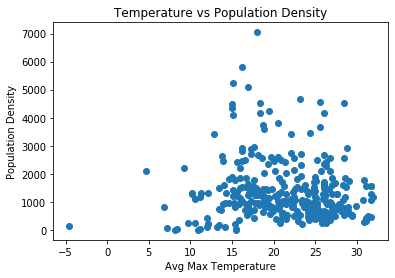

In [9]:
plt.scatter(city_info['avg_tmax'], city_info['density'])
plt.title('Temperature vs Population Density')
plt.xlabel('Avg Max Temperature')
plt.ylabel('Population Density')

In [10]:
#plt.show()
plt.savefig(output_file)